In [236]:
import os
import scanpy as sc
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

home = '/home/kojo/Code/Alz_trVAE'
os.chdir(home)

In [237]:
import seaborn as sns
import matplotlib
from scipy import sparse
from scipy import stats
from matplotlib import pyplot as plt
import reptrvae

In [238]:
sc.set_figure_params(dpi=200)

In [239]:
path_to_save = "./results/alzPro-time/"
sc.settings.figdir = path_to_save

In [240]:
combination = 'U'
normalized = False
specific_cell_type = "all"

In [241]:
conditions = ["3m", "6m", "9m"]
source_condition = "3m"
target_condition = "9m"
cell_type_key = "Group"
condition_key = "Timepoint"

In [242]:
adata = sc.read(f"./data/alzPro_{'normalized' if normalized else 'count'}_{combination}.h5ad")
#adata.uns['log1p']["base"] = None
adata

AnnData object with n_obs × n_vars = 48 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation'

In [243]:
if specific_cell_type != 'all':
    cell_type_adata = adata[adata.obs[cell_type_key] == specific_cell_type]
else:
    cell_type_adata = adata
#cell_type_adata.uns['log1p']["base"] = None
cell_type_adata

AnnData object with n_obs × n_vars = 48 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation'

In [244]:
ctrl_adata = cell_type_adata[cell_type_adata.obs[condition_key] == source_condition]
real_adata = cell_type_adata[cell_type_adata.obs[condition_key] == target_condition]

In [245]:
ctrl_adata.obs['method'] = source_condition
real_adata.obs['method'] = target_condition

/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/ipykernel_launcher.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  """Entry point for launching an IPython kernel.
/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/ipykernel_launcher.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  


In [246]:
real_adata.obs

,Qi ID,sex,Group,Timepoint,Validation,method
32,2143,M,HET,9m,Test,9m
33,2145,M,HET,9m,Train,9m
34,2146,M,HET,9m,Train,9m
35,2147,M,WT,9m,Test,9m
36,2148,M,WT,9m,Train,9m
37,2150,M,WT,9m,Train,9m
38,2156,F,HET,9m,Test,9m
39,2227,F,WT,9m,Test,9m
40,2228,F,WT,9m,Train,9m
41,2229,F,HET,9m,Train,9m


In [247]:
ctrl_adata.X.shape

(16, 2969)

In [248]:
real_adata.X.shape

(16, 2969)

In [249]:
real_adata.var_names

Index(['A2A432|CUL4B', 'A2A5R2|BIG2', 'A2A699|F1712', 'A2A7S8|K1522',
       'A2A8L1|CHD5', 'A2A8L5|PTPRF', 'A2ADY9|DDI2', 'A2AG50|MA7D2',
       'A2AGT5|CKAP5', 'A2AJA9|AJM1',
       ...
       'Q9Z2U0|PSA7', 'Q9Z2U1|PSA5', 'Q9Z2U2|ZN292', 'Q9Z2V5|HDAC6',
       'Q9Z2W0|DNPEP', 'Q9Z2W8|GRIA4', 'Q9Z2W9|GRIA3', 'Q9Z2X1|HNRPF',
       'Q9Z2Y3|HOME1', 'Q9Z2Y8|PLPHP'],
      dtype='object', name='Accession', length=2969)

In [250]:
real_adata.X[:, 0].shape

(16,)

In [251]:
def create_models(ctrl, real):
    models = []
    x = ctrl[ctrl.obs["Validation"] == "Train"].X
    #x = ctrl.X
    for i in range(len(ctrl.X[0])):
        y = real[real.obs["Validation"] == "Train"].X[:, i]
        #y = real.X[:, i]
        model = LinearRegression().fit(x, y)
        models.append(model)
    return models
        
model_list = create_models(ctrl_adata, real_adata)
model_list

[LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegres

In [252]:
ctrl_adata.obs

,Qi ID,sex,Group,Timepoint,Validation,method
0,3131,M,HET,3m,Test,3m
1,3132,M,HET,3m,Train,3m
2,3140,M,HET,3m,Train,3m
3,3141,M,HET,3m,Train,3m
4,3153,F,HET,3m,Test,3m
5,3154,F,HET,3m,Train,3m
6,3156,F,HET,3m,Train,3m
7,3157,F,HET,3m,Train,3m
8,3346,F,WT,3m,Test,3m
9,3347,F,WT,3m,Train,3m


In [253]:
ctrl_adata_valid = ctrl_adata[ctrl_adata.obs["Validation"] == "Test"]
#ctrl_adata_valid = ctrl_adata
ctrl_adata_valid.obs

,Qi ID,sex,Group,Timepoint,Validation,method
0,3131,M,HET,3m,Test,3m
4,3153,F,HET,3m,Test,3m
8,3346,F,WT,3m,Test,3m
12,3606,M,WT,3m,Test,3m


In [254]:
predictions = []
for i in range(len(ctrl_adata_valid.X)):
    pred = []
    for j in range(len(ctrl_adata_valid.X[i])):
        p = model_list[j].predict([ctrl_adata_valid.X[i, :]])
        pred.append(p[0])
    predictions.append(pred)

predictions

[[71928.266,
  70252.2,
  106234.875,
  21150.887,
  0.0,
  109417.92,
  0.0,
  94294.22,
  145438.66,
  22398.291,
  153220.03,
  0.0,
  202373.34,
  47979.258,
  156345.17,
  43296.883,
  0.0,
  0.0,
  119166.945,
  28070.188,
  95999.73,
  0.0,
  57363.977,
  572249.9,
  47220.59,
  17608.77,
  264309.0,
  18144.89,
  0.0,
  0.0,
  272361.88,
  24090.871,
  136803.45,
  214788.1,
  1692679.4,
  0.0,
  0.0,
  107053.11,
  64156.977,
  0.0,
  64906.38,
  126505.64,
  0.0,
  1727238.0,
  30315.215,
  662153.56,
  35423.96,
  0.0,
  58273.74,
  250650.44,
  760394.1,
  2591569.0,
  244248.75,
  141726.02,
  86589.62,
  37710.79,
  20266.234,
  23991.66,
  41107.61,
  116302.75,
  0.0,
  22469.988,
  55789.938,
  1036614.4,
  51945.945,
  194406.73,
  162673.47,
  0.0,
  2373114.0,
  44434.332,
  421702.88,
  0.0,
  293610.6,
  0.0,
  528185.56,
  1686778.0,
  282766.47,
  23937338.0,
  158997.25,
  1488844.8,
  5468315.0,
  -16977.734,
  153764.56,
  93619.72,
  5375479.5,
  1973408.0,


In [255]:
np.array(predictions).shape

(4, 2969)

In [256]:
ctrl_adata_valid.var_names.values

array(['A2A432|CUL4B', 'A2A5R2|BIG2', 'A2A699|F1712', ..., 'Q9Z2X1|HNRPF',
       'Q9Z2Y3|HOME1', 'Q9Z2Y8|PLPHP'], dtype=object)

In [257]:
ctrl_adata_valid

View of AnnData object with n_obs × n_vars = 4 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation', 'method'

In [258]:
vars = pd.DataFrame(index=ctrl_adata_valid.var_names)
regression_reconstructed = sc.AnnData(X=np.array(predictions), obs=ctrl_adata_valid.obs.copy(), var=vars)
regression_reconstructed

AnnData object with n_obs × n_vars = 4 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation', 'method'

In [259]:
regression_reconstructed.obs["Timepoint"] = f"{source_condition}_to_{target_condition}"
regression_reconstructed.obs["method"] = "Linear Regression"
regression_reconstructed.obs

,Qi ID,sex,Group,Timepoint,Validation,method
0,3131,M,HET,3m_to_9m,Test,Linear Regression
4,3153,F,HET,3m_to_9m,Test,Linear Regression
8,3346,F,WT,3m_to_9m,Test,Linear Regression
12,3606,M,WT,3m_to_9m,Test,Linear Regression


In [260]:
real_adata_valid = real_adata[real_adata.obs["Validation"] == "Test"]
#real_adata_valid = real_adata
real_adata_valid.obs

,Qi ID,sex,Group,Timepoint,Validation,method
32,2143,M,HET,9m,Test,9m
35,2147,M,WT,9m,Test,9m
38,2156,F,HET,9m,Test,9m
39,2227,F,WT,9m,Test,9m


In [261]:
ctrl_adata_valid.obs

,Qi ID,sex,Group,Timepoint,Validation,method
0,3131,M,HET,3m,Test,3m
4,3153,F,HET,3m,Test,3m
8,3346,F,WT,3m,Test,3m
12,3606,M,WT,3m,Test,3m


In [262]:
models = ctrl_adata_valid.concatenate(real_adata_valid, regression_reconstructed)
models.obs['method'].unique()

/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


array(['3m', '9m', 'Linear Regression'], dtype=object)

In [263]:
sc.tl.rank_genes_groups(models, reference=target_condition, 
                       groupby="method", groups=['Linear Regression'],
                       key_added='up_reg_genes', n_genes=50)
sc.tl.rank_genes_groups(models, reference='Linear Regression',
                         groupby="method", groups=[target_condition],
                         key_added='down_reg_genes', n_genes=50)
up_genes = models.uns['up_reg_genes']['names']['Linear Regression']
down_genes = models.uns['down_reg_genes']['names'][target_condition]

/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: invalid value encountered in true_divide
  self.expm1_func(mean_rest) + 1e-9
/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:421: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


In [264]:
protein_up = up_genes[0]
print(protein_up)

Q9WTU3|SCN8A


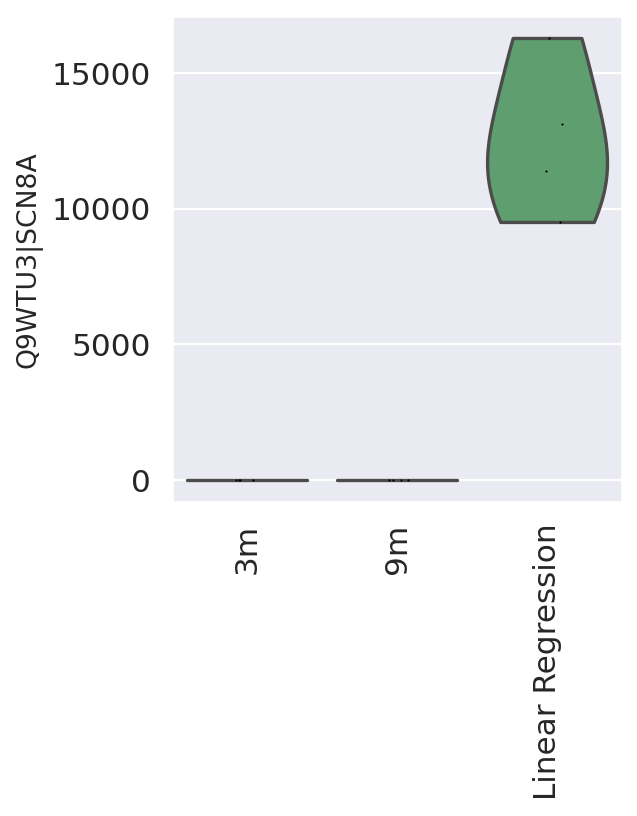

In [265]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys=protein_up, 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
             save="_best_model_cmpr.pdf",
             jitter=True,
            )

In [266]:
protein_down = down_genes[0]
print(protein_down)

Q80TJ1|CAPS1


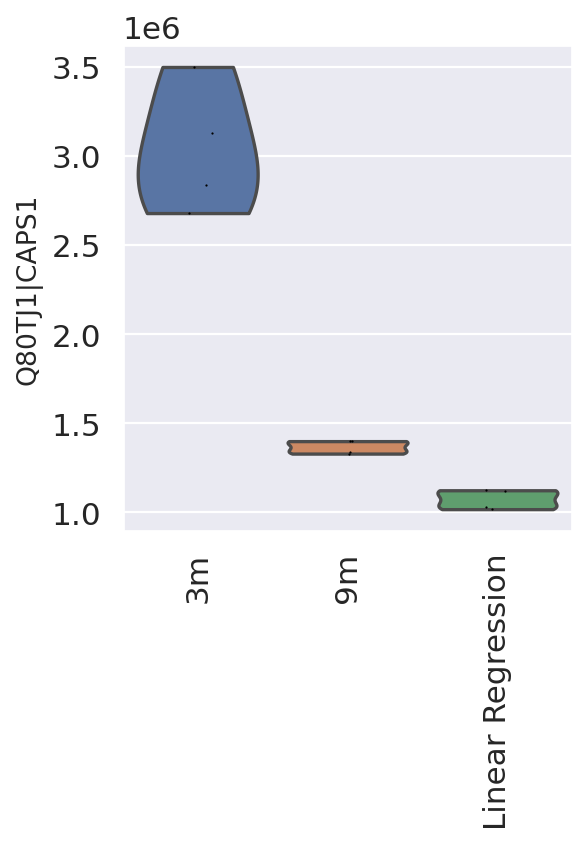

In [267]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys=protein_down, 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
             save="_worst_model_cmpr.pdf",
             jitter=True,
            )

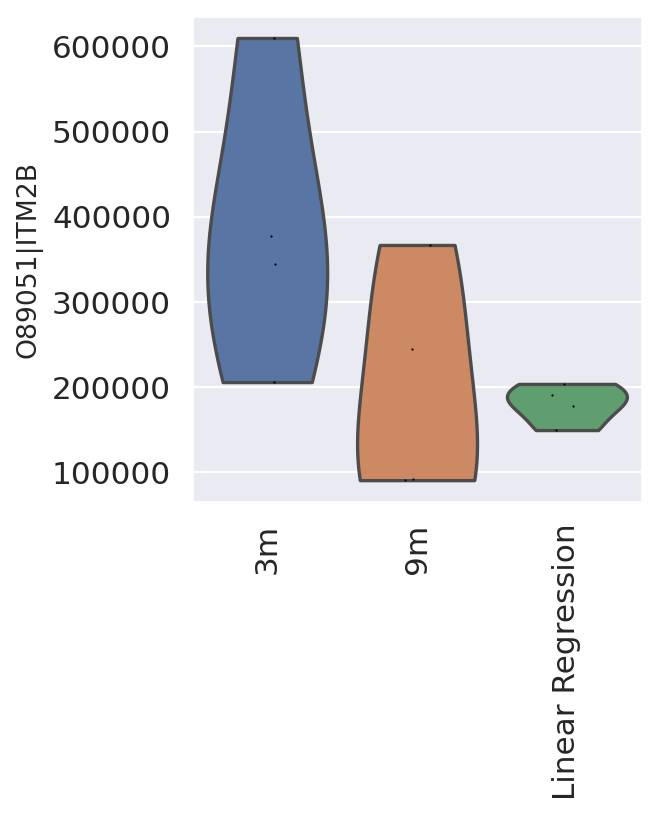

In [268]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys="O89051|ITM2B", 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
             save="_standard_model_cmpr.pdf",
             jitter=True,
            )

In [269]:
top_genes = up_genes.tolist() + down_genes.tolist()

reg_mean_top100: 0.9468487226436879
reg_mean_all: 0.9857358238632006


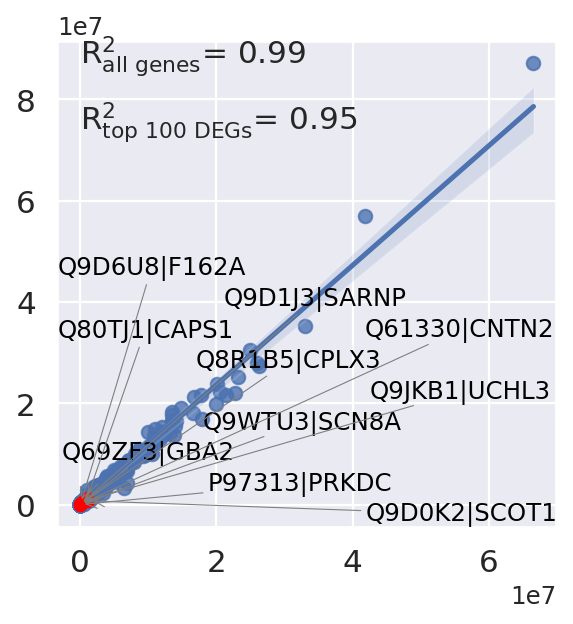

In [270]:
reptrvae.pl.reg_mean_plot(models,
                         top_100_genes=top_genes,
                         gene_list=top_genes[:5] + top_genes[50:55],
                         condition_key=condition_key,
                         axis_keys={'x': f"{source_condition}_to_{target_condition}", 'y': target_condition},
                         labels={'x': "", 'y': ""},
                         path_to_save=os.path.join(path_to_save, f"linearRegression_{specific_cell_type}_{source_condition}_to_{target_condition}_{'normalized' if normalized else 'count'}_{combination}_reg_mean.pdf"),
                         legend=False,
                         show=True,
                         x_coeff=1.0,
                         y_coeff=0.0)

reg_var_top100: 0.8128178146715901
reg_var_all: 0.6705028980017386


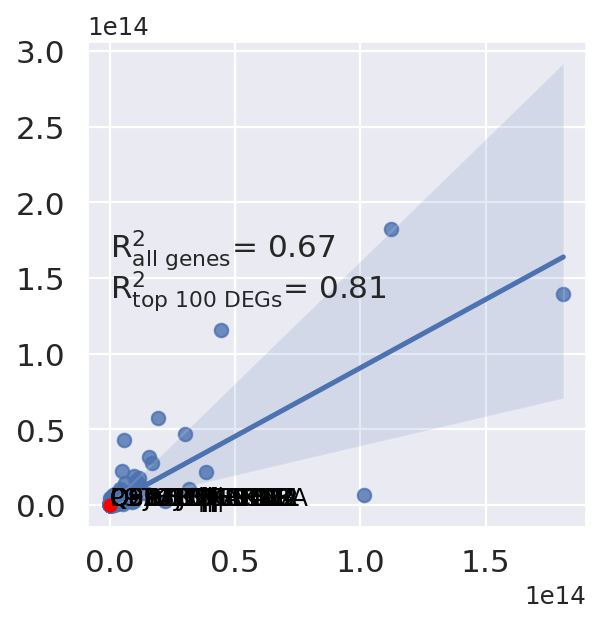

In [271]:
reptrvae.pl.reg_var_plot(models,
                         top_100_genes=top_genes,
                         gene_list=top_genes[:5] + top_genes[50:55],
                         condition_key=condition_key,
                         axis_keys={'x': f"{source_condition}_to_{target_condition}", 'y': target_condition},
                         labels={'x': "", 'y': ""},
                         path_to_save=os.path.join(path_to_save, f"linearRegression_{specific_cell_type}_{source_condition}_to_{target_condition}_{'normalized' if normalized else 'count'}_{combination}_reg_var.pdf"),
                         legend=False,
                         show=True,
                         x_coeff=1.0,
                         y_coeff=0.1)

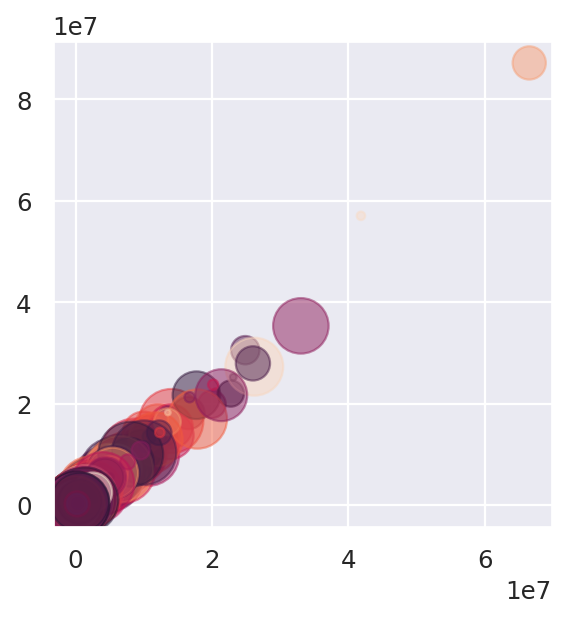

In [273]:
np.random.seed(2432532)

N = len(regression_reconstructed.X[0])
#x = list(protein_meansP.keys())
x = [sum(regression_reconstructed.X[:,i])/len(regression_reconstructed.X[:,i]) for i in range(len(regression_reconstructed.X[0]))]
#y = list(protein_meansR.keys())
y = [sum(real_adata_valid.X[:,i])/len(real_adata_valid.X[:,i]) for i in range(len(real_adata_valid.X[0]))]
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [274]:
means = pd.DataFrame(list(zip(x, y)), columns=['Predicted', 'Actual'])
means.head()

,Predicted,Actual
0,63205.907227,70900.0
1,61841.964844,58150.0
2,124449.509766,129200.0
3,23535.766113,28100.0
4,0.000000,0.0


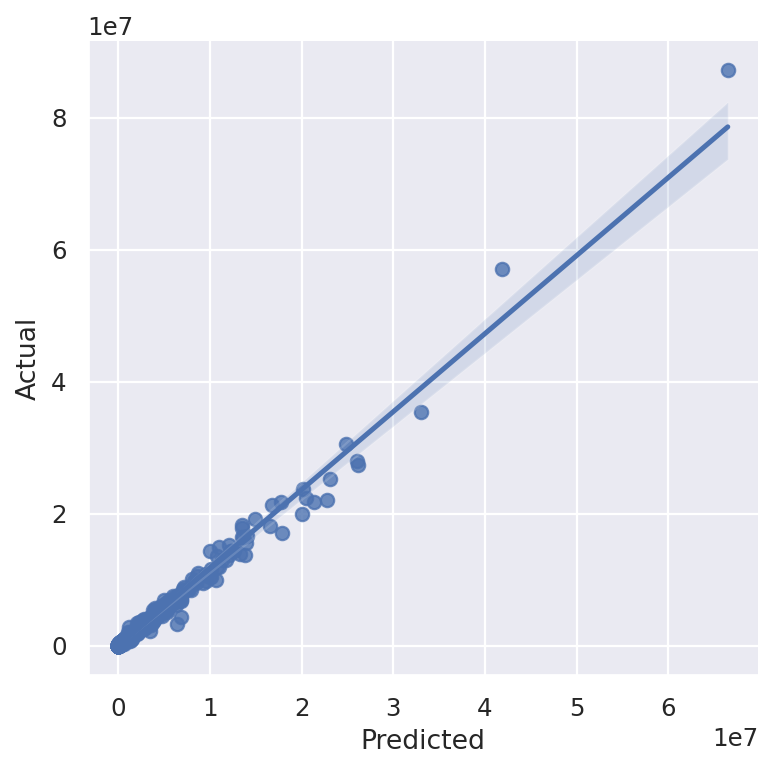

In [275]:
import seaborn as sb

sb.lmplot(x='Predicted', y='Actual', data=means)

In [276]:
stats.pearsonr(x, y)

(0.992842295235084, 0.0)

In [277]:
stats.spearmanr(x, y)

SpearmanrResult(correlation=0.9922240596679613, pvalue=0.0)